Описание дынных. Исходный датасет имеет 10 переменных.9 первых переменных - это независимые. Последняя переменная "Category" - зависимая переменная. Переменная "Category" состоит из двух типов: 0 и 1, где 0 - это здоровые люди, 1 - заболевшие.
Конвертируем наш документ в формат csv с разделителем "запятая". 
Осуществим подготовку данных, импортировав необходимые библиотеки.

In [1]:
# Data Preprocessing

In [2]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

Загрузим наш предварительно конвертированный файл.

In [3]:
# Importing the dataset
df = pd.read_csv('CR_2.csv', sep=',')

Выведем данные на экран чтобы убедиться в правильности отображения. Имеем 10 колонок и 615 строк.

In [4]:
df

,Age,Sex,ALB,ALP,ALT,AST,CHE,GGT,PROT,Category
0,32,m,38.5,52.5,7.7,22.1,6.93,12.1,69.0,0
1,32,m,38.5,70.3,18.0,24.7,11.17,15.6,76.5,0
2,32,m,46.9,74.7,36.2,52.6,8.84,33.2,79.3,0
3,32,m,43.2,52.0,30.6,22.6,7.33,33.8,75.7,0
4,32,m,39.2,74.1,32.6,24.8,9.15,29.9,68.7,0
...,...,...,...,...,...,...,...,...,...,...
610,62,f,32.0,416.6,5.9,110.3,5.57,650.9,68.5,1
611,64,f,24.0,102.8,2.9,44.4,1.54,35.9,71.3,1
612,64,f,29.0,87.3,3.5,99.0,1.66,64.2,82.0,1
613,46,f,33.0,NaN,39.0,62.0,3.56,50.0,71.0,1


Для определения пропущенных значений в переменных выведем общее количество и процент пропусков по переменным. 

In [5]:
# Cheking Missing data
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data

,Total,Percent
ALP,18,0.029268
PROT,1,0.001626
ALT,1,0.001626
ALB,1,0.001626
Category,0,0.000000
GGT,0,0.000000
CHE,0,0.000000
AST,0,0.000000
Sex,0,0.000000
Age,0,0.000000


Как видим, есть пропущенные значения. Проведем поиск и подстановку пропущенных значений, при чем имеем картину, что пропуски
присутствуют только в числовых значений. Соответственно произведем поиск и подстановку только числовых значений. 

In [6]:
# Function Missing data (numeric)
def fill_missing_num(x):
    num_var = list(x._get_numeric_data().columns)
    for col_names in num_var:        
        prep_med = SimpleImputer(missing_values=np.nan, strategy='mean')
        prep_med.fit(x[num_var])
        x[num_var] = prep_med.transform(x[num_var])
    return(x)

Заполним пропуски полученными значениями. 

In [7]:
# Filling NA 
from sklearn.impute import SimpleImputer
df = fill_missing_num(df)

Заново выведем общее количество и процент пропусков

In [8]:
# Cheking Missing data
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data

,Total,Percent
Category,0,0.0
PROT,0,0.0
GGT,0,0.0
CHE,0,0.0
AST,0,0.0
ALT,0,0.0
ALP,0,0.0
ALB,0,0.0
Sex,0,0.0
Age,0,0.0


Выведем статистику по числовым значениям. Как и следовало ожидать - пропущенных значений нет. 

In [9]:
df.describe()

,Age,ALB,ALP,ALT,AST,CHE,GGT,PROT,Category
count,615.000000,615.000000,615.000000,615.000000,615.000000,615.000000,615.000000,615.000000,615.000000
mean,47.408130,41.620195,68.283920,28.450814,34.786341,8.196634,39.533171,72.044137,0.133333
std,10.055105,5.775920,25.643955,25.448940,33.090690,2.205657,54.661071,5.398234,0.340211
min,19.000000,14.900000,11.300000,0.900000,10.600000,1.420000,4.500000,44.800000,0.000000
25%,39.000000,38.800000,52.950000,16.400000,21.600000,6.935000,15.700000,69.300000,0.000000
50%,47.000000,41.900000,66.700000,23.000000,25.900000,8.260000,23.300000,72.200000,0.000000
75%,54.000000,45.200000,79.300000,33.050000,32.900000,9.590000,40.200000,75.400000,0.000000
max,77.000000,82.200000,416.600000,325.300000,324.000000,16.410000,650.900000,90.000000,1.000000


Осуществим работы с выбросами в числовых переменных: для этого запишем функцию для поиска и замены данных, выходящих за 
пределы 3 сигма.

In [10]:
# Function Outliers
def outliers(df):
    num_var = list(df._get_numeric_data().columns)
    for col_names in num_var:
        df[col_names] = df[col_names].apply(lambda y: df[col_names].mean()-3*df[col_names].std() 
                            if y < df[col_names].mean()-3*df[col_names].std() else y)
        df[col_names] = df[col_names].apply(lambda y: df[col_names].mean()+3*df[col_names].std() 
                            if y > df[col_names].mean()+3*df[col_names].std() else y)
    return(df)

Запишем в наш датафрейм уже очищенные от выбросов переменные и повторно выведем статистику. 
В результате выполнения очистки можно наблюдать, что показатели максимального, минимального,среднего значений, 
а также стандартного отклонения изменились. Значит у нас имелись выбросы, но из-за проведенных выше работ с выбросами, 
мы от них избавились, поэтому теперь наши данные соответствуют нормальному распределению,что говорит об отсутствии выбросов.

In [11]:
# Outliers
df = outliers(df)
df.describe()

,Age,ALB,ALP,ALT,AST,CHE,GGT,PROT,Category
count,615.000000,615.000000,615.000000,615.000000,615.000000,615.000000,615.000000,615.000000,615.000000
mean,47.408130,41.619142,67.666273,27.375654,33.139378,8.191132,36.816201,72.117821,0.133333
std,10.055105,5.363302,20.790903,18.293360,23.652140,2.184622,37.237116,5.085763,0.340211
min,19.000000,24.292435,11.300000,0.900000,10.600000,1.579662,4.500000,55.849434,0.000000
25%,39.000000,38.800000,52.950000,16.400000,21.600000,6.935000,15.700000,69.300000,0.000000
50%,47.000000,41.900000,66.700000,23.000000,25.900000,8.260000,23.300000,72.200000,0.000000
75%,54.000000,45.200000,79.300000,33.050000,32.900000,9.590000,40.200000,75.400000,0.000000
max,77.000000,58.479990,145.215784,104.797633,134.058412,14.809541,203.516384,87.420364,1.000000


Проведем проверку типов данных по переменным и выявим соответствие.

In [12]:
df.dtypes

Age         float64
Sex          object
ALB         float64
ALP         float64
ALT         float64
AST         float64
CHE         float64
GGT         float64
PROT        float64
Category    float64
dtype: object

Мы получили подготовленный набор данных, который можно далее использовать для моделирования.

In [13]:
# Logistic Regression

В нашем датасете присутствуют качественные переменные - пол. Ее необходимо закодировать с помощью функции.
Запишем список нечисловых переменных и проведем кодирование качественных переменных. Результат запишем обратно в базу.

In [14]:
# Function Encoding
def encoding_char(x):
    char_var = list(set(x.columns) - set(x._get_numeric_data().columns))
    for col_names in char_var:
        f = pd.factorize(x[col_names])
        x[col_names] = pd.factorize(x[col_names])[0]
    return(x)

In [15]:
# Encoding categorical data
df = encoding_char(df)

Посмотрим, как будут выглядеть наши закодированные данные. Теперь все переменные в ней являются числовыми. 
С ними можно теперь работать.

In [16]:
df

,Age,Sex,ALB,ALP,ALT,AST,CHE,GGT,PROT,Category
0,32.0,0,38.500000,52.500000,7.7,22.1,6.930000,12.100000,69.0,0.0
1,32.0,0,38.500000,70.300000,18.0,24.7,11.170000,15.600000,76.5,0.0
2,32.0,0,46.900000,74.700000,36.2,52.6,8.840000,33.200000,79.3,0.0
3,32.0,0,43.200000,52.000000,30.6,22.6,7.330000,33.800000,75.7,0.0
4,32.0,0,39.200000,74.100000,32.6,24.8,9.150000,29.900000,68.7,0.0
...,...,...,...,...,...,...,...,...,...,...
610,62.0,1,32.000000,145.215784,5.9,110.3,5.570000,203.516384,68.5,1.0
611,64.0,1,24.292435,102.800000,2.9,44.4,1.579662,35.900000,71.3,1.0
612,64.0,1,29.000000,87.300000,3.5,99.0,1.660000,64.200000,82.0,1.0
613,46.0,1,33.000000,68.283920,39.0,62.0,3.560000,50.000000,71.0,1.0


Разделим наш датасет на обучающую и тестовую вывборку по пропорции 20% на 80%

In [17]:
# Splitting the dataset into the Training set and Test set
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=13)

Проведем шкалирование данных. Из библиотеки импортируем класс StandardScaler и рассчитаем и запишем в переменную необходимые 
параметры шкалирования, посчитанные на основе обучающей выборки. Затем с использованием жтих параметров шкалируем обучающую и 
тестовую выборкую. Эндогенная переменная в шкалировании не нуждается. Она должна быть дискретного типа 0;1. Что у нас и есть.

In [18]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler().fit(X_train)
X_train = sc_X.transform(X_train)
X_test = sc_X.transform(X_test)

Строим базовую модель. Для жтого из библиотеки statsmodels с помощью ф-и Logit посмотрим отчет по модели. Видим, что из все 
переменных значимыми будут переменные: Х5, Х6,Х8; т.к. их значения Р не превышают 1%. Остальные переменные не будем использовать
для построения классификаторов.

In [19]:
# Baseline model
import statsmodels.api as sm
lr = sm.Logit(y_train, X_train).fit()
print(lr.summary2())

Optimization terminated successfully.
         Current function value: 0.319196
         Iterations 8
                         Results: Logit
Model:              Logit            Pseudo R-squared: 0.198     
Dependent Variable: y                AIC:              332.0884  
Date:               2020-11-23 12:29 BIC:              369.8747  
No. Observations:   492              Log-Likelihood:   -157.04   
Df Model:           8                LL-Null:          -195.80   
Df Residuals:       483              LLR p-value:      1.5480e-13
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     8.0000                                       
--------------------------------------------------------------------
       Coef.     Std.Err.       z       P>|z|      [0.025     0.975]
--------------------------------------------------------------------
x1    -0.1793      0.1523    -1.1773    0.2391    -0.4779     0.1192
x2     0.0076      0.1572     0.0482    0.9616    -0.3

Используем оставленные нами значения Х5, Х6,Х8 для построения классификаторов. Преобразуем обучающую и тестовую выборку, 
оставив только значимые переменные. При чем проведем эксперимент: какая пара значений имеет лучшее качество.

Оставим значения Х5, Х6. Имеем:

In [20]:
# p-value < 1% Features
X_train1 = X_train[:,[4,5]]
X_test1 = X_test[:,[4,5]]

Обучим модель логистической регрессии с использованием библиотеки sklearn. 

In [21]:
# Fitting Logistic Regression to the Training set (2 variables)
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(random_state = 13).fit(X_train1, y_train)

Проведем прогноз на тестовой выборке и оценим качество этой модели. Видим, что уровень качества базовой модели очень высок
и превышает 95%. Значит 95% объектов у нас распознаны верно. 

In [22]:
# Predicting the Test set results
y_pred = lr.predict(X_test1)
lr.score(X_test1,y_test)

0.959349593495935

Оставим значения Х6, Х8. Имеем:

In [25]:
# p-value < 1% Features
X_train2 = X_train[:,[5,7]]
X_test2 = X_test[:,[5,7]]

Обучим модель логистической регрессии с использованием библиотеки sklearn. 

In [26]:
# Fitting Logistic Regression to the Training set (2 variables)
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(random_state = 13).fit(X_train2, y_train)

Проведем прогноз на тестовой выборке и оценим качество этой модели. Видим, что уровень качества базовой модели очень высок
и превышает 94%. Значит 94% объектов у нас распознаны верно. 

In [27]:
# Predicting the Test set results
y_pred = lr.predict(X_test2)
lr.score(X_test2,y_test)

0.943089430894309

Оставим значения Х5, Х8. Имеем:

In [28]:
# p-value < 1% Features
X_train3 = X_train[:,[4,7]]
X_test3 = X_test[:,[4,7]]

Обучим модель логистической регрессии с использованием библиотеки sklearn. 

In [29]:
# Fitting Logistic Regression to the Training set (2 variables)
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(random_state = 13).fit(X_train3, y_train)

Проведем прогноз на тестовой выборке и оценим качество этой модели. Видим, что уровень качества базовой модели очень высок
и превышает 89%. Значит 89% объектов у нас распознаны верно. 

In [30]:
# Predicting the Test set results
y_pred = lr.predict(X_test3)
lr.score(X_test3,y_test)

0.8943089430894309

В соответствии с качеством модели делаем вывод, что стоит оставить переменные Х5 и Х6, т.к. качество можели составляет 95.9%

Посмотрим на таблицу сопряженности. Видим, что 5 положительных случаев ложно определены как отрицательные и 0 отрицательных
случаев ложно определены как положительный.

In [23]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[108   0]
 [  5  10]]


Посмотрим на область значений нашей функции для визуализации разделяющей прямой. Это нужно для того, чтобы понимать как объекты
одного типа отделяются от объектов другого типа. По каждой переменной создадим множество точек в диапазоне изменения пременных 
от минимума до максимума с шагом в 0,01. Множество зеленых точек - прогноз класса 1, множество красных точек - прогноз класса 0.

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


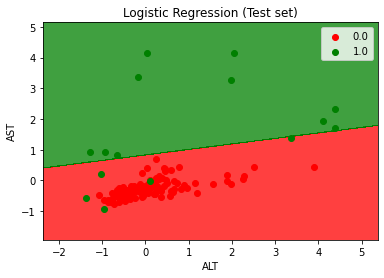

In [24]:
# Visualising the Test set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_test1, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, lr.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Logistic Regression (Test set)')
plt.xlabel('ALT')
plt.ylabel('AST')
plt.legend()
plt.show()

Исходя из графика можем сделать вывод, что чем значения ALT и AST меньше, тем меньше людей подвержены заболеваию (количество 
здоровых больше). И чем значения ALT и AST, тем больше люди подвержены заболеваию (количество больных больше). Зеленые точки на 
красном фоне - ошибка модели, заболевшие люди определились как здоровые. Красных точек на зеленом фоне нет. 

Запишем наши выборки в объект для того, чтобы использовать ее для построения все основных моделей.

In [25]:
import pickle
obj = {'X_train': X_train1, 'X_test': X_test1,'y_train': y_train,'y_test': y_test}
output = open('data.pkl', 'wb')
pickle.dump(obj, output, 2)
output.close()

14 Classification Neural Network


Рассмотрим модель классификации, основанную на нейронных сетях. Импортируем библиотеки, данные и модули.

In [26]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [27]:
# Importing prepared dataset
import pickle
input = open('data.pkl', 'rb')
obj = pickle.load(input)
input.close()
X_train = obj["X_train"]
X_test = obj["X_test"]
y_train = obj["y_train"]
y_test = obj["y_test"]

In [28]:
# Install Tensorflow
# Install Keras
# Importing the Keras libraries and packages
import keras
from keras.models import Sequential
from keras.layers import Dense

Построим нейронную сеть прямой передачи сигнала. Обычно для этого используется сужающая архитектура -число нейронов на первом
слое не превышает число нейронов на входном слое. Т.к. у нас всего 2 параметра классификации - на входном слое у нас будет всего
2 нейрона. Поэтому на 1м слое мы тоже будем использовать 2 нейрона. На втором слое выберем один нейрон, т.к.  одного
элемента со значением 0;1  будет достаточно. Число выходов классификатора= число классов -1. Используем сигмоидальную ф-ю, т.к.
она изменяется в интервале [0;1].

In [29]:
# Initialising the ANN
cnn = Sequential()

# Adding the input layer and the first hidden layer
cnn.add(Dense(units = 2, kernel_initializer = 'uniform', activation = 'relu', input_dim = 2))

# Adding the output layer
cnn.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))

# Compiling the ANN
cnn.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

Обучим нашу нейронную сеть в течении 100 эпох и посмотрим, каков прогноз и качество прогноза на тестовой выборке.

In [31]:
# Fitting the ANN to the Training set
cnn.fit(X_train, y_train, batch_size = 10, epochs = 100)

Epoch 1/100
50/50 [==============================] - 0s 600us/step - loss: 0.6838 - accuracy: 0.8577
Epoch 2/100
50/50 [==============================] - 0s 520us/step - loss: 0.6625 - accuracy: 0.8638
Epoch 3/100
50/50 [==============================] - 0s 440us/step - loss: 0.6362 - accuracy: 0.8638
Epoch 4/100
50/50 [==============================] - 0s 500us/step - loss: 0.6056 - accuracy: 0.8638
Epoch 5/100
50/50 [==============================] - 0s 420us/step - loss: 0.5711 - accuracy: 0.8638
Epoch 6/100
50/50 [==============================] - 0s 520us/step - loss: 0.5349 - accuracy: 0.8760
Epoch 7/100
50/50 [==============================] - 0s 440us/step - loss: 0.4984 - accuracy: 0.9045
Epoch 8/100
50/50 [==============================] - 0s 460us/step - loss: 0.4623 - accuracy: 0.9106
Epoch 9/100
50/50 [==============================] - 0s 440us/step - loss: 0.4280 - accuracy: 0.9187
Epoch 10/100
50/50 [==============================] - 0s 460us/step - loss: 0.3957 - accura

50/50 [==============================] - 0s 440us/step - loss: 0.1561 - accuracy: 0.9431
Epoch 79/100
50/50 [==============================] - 0s 420us/step - loss: 0.1558 - accuracy: 0.9431
Epoch 80/100
50/50 [==============================] - 0s 500us/step - loss: 0.1558 - accuracy: 0.9431
Epoch 81/100
50/50 [==============================] - 0s 420us/step - loss: 0.1556 - accuracy: 0.9431
Epoch 82/100
50/50 [==============================] - 0s 440us/step - loss: 0.1556 - accuracy: 0.9431
Epoch 83/100
50/50 [==============================] - 0s 440us/step - loss: 0.1554 - accuracy: 0.9431
Epoch 84/100
50/50 [==============================] - 0s 440us/step - loss: 0.1554 - accuracy: 0.9411
Epoch 85/100
50/50 [==============================] - 0s 480us/step - loss: 0.1553 - accuracy: 0.9431
Epoch 86/100
50/50 [==============================] - 0s 440us/step - loss: 0.1551 - accuracy: 0.9411
Epoch 87/100
50/50 [==============================] - 0s 460us/step - loss: 0.1551 - accuracy: 

Проведем прогнозирование 

In [45]:
# Predicting the Test set results
y_pred = cnn.predict(X_test)
y_pred = (y_pred > 0.5)

In [ ]:
Построим таблицу сопряженности. Видим, что 4 положительных случаев ложно определены как отрицательные и 1 отрицательный
случаей ложно определен как положительный. 

In [46]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[107   1]
 [  4  11]]


In [ ]:
Посмотрим на разделяющую кривая. Она нелинейна. 5 объектов определены ошибочно.

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


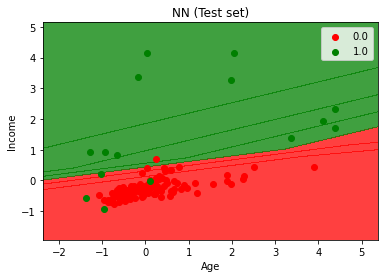

In [47]:
# Visualising the Test set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, cnn.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('NN (Test set)')
plt.xlabel('ALT')
plt.ylabel('AST')
plt.legend()
plt.show()

Увеличим число нейронов на первом слое до 8ми. Получим:

In [48]:
# Initialising the ANN
cnn = Sequential()

# Adding the input layer and the first hidden layer
cnn.add(Dense(units = 8, kernel_initializer = 'uniform', activation = 'relu', input_dim = 2))

# Adding the output layer
cnn.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))

# Compiling the ANN
cnn.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

Обучим нашу нейронную сеть в течении 100 эпох и посмотрим, каков прогноз и качество прогноза на тестовой выборке.

In [49]:
# Fitting the ANN to the Training set
cnn.fit(X_train, y_train, batch_size = 10, epochs = 100)

Epoch 1/100
50/50 [==============================] - 0s 880us/step - loss: 0.6830 - accuracy: 0.8394
Epoch 2/100
50/50 [==============================] - 0s 960us/step - loss: 0.6547 - accuracy: 0.8862
Epoch 3/100
50/50 [==============================] - 0s 960us/step - loss: 0.6084 - accuracy: 0.9045
Epoch 4/100
50/50 [==============================] - 0s 960us/step - loss: 0.5397 - accuracy: 0.9187
Epoch 5/100
50/50 [==============================] - 0s 1ms/step - loss: 0.4632 - accuracy: 0.9329
Epoch 6/100
50/50 [==============================] - 0s 960us/step - loss: 0.3920 - accuracy: 0.9370
Epoch 7/100
50/50 [==============================] - 0s 960us/step - loss: 0.3335 - accuracy: 0.9370
Epoch 8/100
50/50 [==============================] - 0s 1ms/step - loss: 0.2888 - accuracy: 0.9370
Epoch 9/100
50/50 [==============================] - 0s 960us/step - loss: 0.2554 - accuracy: 0.9350
Epoch 10/100
50/50 [==============================] - 0s 1ms/step - loss: 0.2311 - accuracy: 0.

50/50 [==============================] - 0s 741us/step - loss: 0.1351 - accuracy: 0.9512
Epoch 82/100
50/50 [==============================] - 0s 720us/step - loss: 0.1348 - accuracy: 0.9512
Epoch 83/100
50/50 [==============================] - 0s 720us/step - loss: 0.1345 - accuracy: 0.9512
Epoch 84/100
50/50 [==============================] - 0s 729us/step - loss: 0.1344 - accuracy: 0.9512
Epoch 85/100
50/50 [==============================] - 0s 800us/step - loss: 0.1339 - accuracy: 0.9533
Epoch 86/100
50/50 [==============================] - 0s 800us/step - loss: 0.1336 - accuracy: 0.9533
Epoch 87/100
50/50 [==============================] - 0s 831us/step - loss: 0.1333 - accuracy: 0.9533
Epoch 88/100
50/50 [==============================] - 0s 800us/step - loss: 0.1331 - accuracy: 0.9533
Epoch 89/100
50/50 [==============================] - 0s 720us/step - loss: 0.1328 - accuracy: 0.9533
Epoch 90/100
50/50 [==============================] - 0s 720us/step - loss: 0.1325 - accuracy: 

Проведем прогнозирование 

In [50]:
# Predicting the Test set results
y_pred = cnn.predict(X_test)
y_pred = (y_pred > 0.5)

Построим таблицу сопряженности. Видим, что 3 положительных случаев ложно определены как отрицательные и 1 отрицательный
случаей ложно определен как положительный. Как видим, усложнение конфигурации сети в данном случае привело к незначительному
улучшению модели

In [52]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[107   1]
 [  3  12]]


Посмотрим, как изменилась наша разделяющая кривая. Она нелинейна. Ее степень немного выше, наблюдаем небольшое улучшение
результата.

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


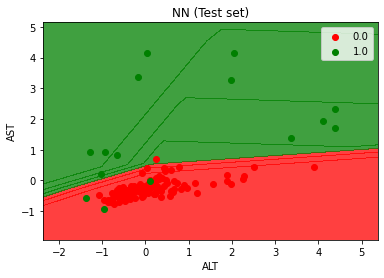

In [54]:
# Visualising the Test set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, cnn.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('NN (Test set)')
plt.xlabel('ALT')
plt.ylabel('AST')
plt.legend()
plt.show()

Увеличим число нейронов на первом слое до 16ми. Получим:

In [55]:
# Initialising the ANN
cnn = Sequential()

# Adding the input layer and the first hidden layer
cnn.add(Dense(units = 16, kernel_initializer = 'uniform', activation = 'relu', input_dim = 2))

# Adding the output layer
cnn.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))

# Compiling the ANN
cnn.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

Обучим нашу нейронную сеть в течении 100 эпох и посмотрим, каков прогноз и качество прогноза на тестовой выборке.

In [56]:
# Fitting the ANN to the Training set
cnn.fit(X_train, y_train, batch_size = 10, epochs = 100)

Epoch 1/100
50/50 [==============================] - 0s 1ms/step - loss: 0.6776 - accuracy: 0.8801
Epoch 2/100
50/50 [==============================] - 0s 1ms/step - loss: 0.6251 - accuracy: 0.9065
Epoch 3/100
50/50 [==============================] - 0s 1ms/step - loss: 0.5373 - accuracy: 0.9248
Epoch 4/100
50/50 [==============================] - 0s 1ms/step - loss: 0.4344 - accuracy: 0.9350
Epoch 5/100
50/50 [==============================] - 0s 1ms/step - loss: 0.3424 - accuracy: 0.9370
Epoch 6/100
50/50 [==============================] - 0s 1ms/step - loss: 0.2769 - accuracy: 0.9350
Epoch 7/100
50/50 [==============================] - 0s 1ms/step - loss: 0.2342 - accuracy: 0.9350
Epoch 8/100
50/50 [==============================] - 0s 1ms/step - loss: 0.2085 - accuracy: 0.9350
Epoch 9/100
50/50 [==============================] - 0s 1ms/step - loss: 0.1917 - accuracy: 0.9350
Epoch 10/100
50/50 [==============================] - 0s 880us/step - loss: 0.1816 - accuracy: 0.9370
Epoch 1

50/50 [==============================] - 0s 880us/step - loss: 0.1308 - accuracy: 0.9512
Epoch 82/100
50/50 [==============================] - 0s 800us/step - loss: 0.1309 - accuracy: 0.9512
Epoch 83/100
50/50 [==============================] - 0s 960us/step - loss: 0.1309 - accuracy: 0.9533
Epoch 84/100
50/50 [==============================] - 0s 800us/step - loss: 0.1302 - accuracy: 0.9512
Epoch 85/100
50/50 [==============================] - 0s 880us/step - loss: 0.1300 - accuracy: 0.9512
Epoch 86/100
50/50 [==============================] - 0s 800us/step - loss: 0.1296 - accuracy: 0.9533
Epoch 87/100
50/50 [==============================] - 0s 800us/step - loss: 0.1293 - accuracy: 0.9533
Epoch 88/100
50/50 [==============================] - 0s 880us/step - loss: 0.1291 - accuracy: 0.9533
Epoch 89/100
50/50 [==============================] - 0s 880us/step - loss: 0.1292 - accuracy: 0.9533
Epoch 90/100
50/50 [==============================] - 0s 800us/step - loss: 0.1286 - accuracy: 

Проведем прогнозирование 

In [57]:
# Predicting the Test set results
y_pred = cnn.predict(X_test)
y_pred = (y_pred > 0.5)

Построим таблицу сопряженности. Видим, что 3 положительных случаев ложно определены как отрицательные и 1 отрицательный
случаей ложно определен как положительный. Как видим, усложнение конфигурации сети в данном случае не привело улучшению модели

In [59]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[107   1]
 [  3  12]]


Посмотрим, как изменрилась наша разделяющая кривая. Она нелинейна. Ее степень немного выше, улучшение
результата не наблюдаем.

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


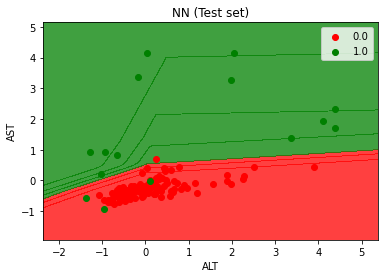

In [60]:
# Visualising the Test set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, cnn.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('NN (Test set)')
plt.xlabel('ALT')
plt.ylabel('AST')
plt.legend()
plt.show()

ВЫВОД
Исходя из всего вышеприведенного, можем сделать вывод, что в данном случае усложнение модели не приведет к значительным сдвигам
результата в положительную сторону. Можно сказать, что скорее всего мы достигли максимального качества данной модели. 